<a href="https://colab.research.google.com/github/Vrivas99/Google_colab/blob/main/EVA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

# Dependencias

In [3]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from typing import List, Tuple #typing
from keras import layers, activations, regularizers

# Carga de datos

In [4]:
Data = List[List[List[float]]] #type alias

In [5]:
def load_dataset() -> Tuple[Data,Data,Data,Data]: #type check
 (trainX, trainY), (testX, testY) =  keras.datasets.fashion_mnist.load_data()
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)) #reshape 2 single channel
 testX = testX.reshape((testX.shape[0], 28, 28, 1)) #reshape 2 single channel
 trainY = keras.utils.to_categorical(trainY) #one-hot-encode target
 testY = keras.utils.to_categorical(testY) #one-hot-encode target
 return trainX, trainY, testX, testY

# Transformación de datos

In [6]:
def prep_pixels(train:List, test:List) -> Tuple[Data,Data]: #type check
 train_norm = train.astype('float32') #integers 2 float
 test_norm = test.astype('float32') #integers 2 float
 train_norm = train_norm / 255.0 #normalization range 0-1
 test_norm = test_norm / 255.0 #normalization range 0-1
 return train_norm, test_norm

# Visualización

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
def view_data(train_x:List, train_y:List, test_x:List, test_y:List):
    plt.figure(figsize=(5,5)) #summarize loaded dataset

    for i in range(9):
        label_index = np.argmax(train_y[i])
        if 0 <= label_index < len(class_names):
            plt.subplot(3, 3, i + 1)
            plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
            plt.title(class_names[label_index])
    plt.show()
    print('\nTrain: X=%s, y=%s' % (train_x.shape, train_y.shape)) #summarize loaded dataset
    print('Test: X=%s, y=%s' % (test_x.shape, test_y.shape),"\n") #summarize loaded dataset

4422102/4422102 [==============================] - 0s 0us/step


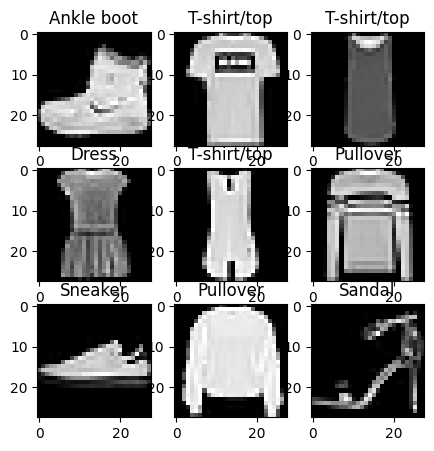


Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10) 



In [9]:
trainX, trainY, testX, testY = load_dataset() #execute load dataset
trainX, testX = prep_pixels(trainX, testX) #execute pixel preparation
view_data(trainX, trainY, testX, testY) #execute graph

In [10]:
class defaultNet:
    def __init__(self, neurons=[], num_layers=4):
        self.h = neurons
        self.num_layers = num_layers
        self.model = self._build_model()

    def _build_model(self):
        model = keras.Sequential()
        model.add(keras.layers.Flatten(input_shape=(28, 28)))

        for i in range(self.num_layers):
            if i < len(self.h):
                model.add(keras.layers.Dense(self.h[i], activation='relu'))
            else:
                # If there are more layers specified than the length of h,
                # default to the last value in h
                model.add(keras.layers.Dense(self.h[-1], activation='relu'))

        model.add(keras.layers.Dense(10, activation='softmax'))
        return model

    def compile_model(self):
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy']
        )

    def summary(self):
        self.model.summary()

    def train(self, trainX, trainY, testX, testY, epochs=150, batch_size=200):
        hist = self.model.fit(trainX, trainY,
                              epochs=epochs,
                              batch_size=batch_size,
                              validation_data=(testX, testY))
        return hist

    def plot_loss_and_accuracy(self, hist):
        plt.plot(hist.history['loss'], label='Training Loss')
        plt.plot(hist.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(hist.history['accuracy'], label='Training Accuracy')
        plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

In [11]:
model_1 = defaultNet(h=[60, 30, 20], num_layers=6)
model_1.compile_model()
model_1.summary()
hist = model_1.train(trainX, trainY, testX, testY)
model_1.plot_loss_and_accuracy(hist)

TypeError: defaultNet.__init__() got an unexpected keyword argument 'h'

# Modelo 1 (pequeño)

## 2. Arquitectura

In [ ]:
h1 = 60
h2 = 30

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_97 (Dense)            (None, 60)                47100     
                                                                 
 dense_98 (Dense)            (None, 30)                1830      
                                                                 
 dense_99 (Dense)            (None, 30)                930       
                                                                 
 dense_100 (Dense)           (None, 30)                930       
                                                                 
 dense_101 (Dense)           (None, 10)                310       
                                                                 
Total params: 51100 (199.61 KB)
Trainable params: 511

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=150,
                    batch_size=200,
               validation_data=(testX,testY))

Epoch 1/150
300/300 [==============================] - 3s 6ms/step - loss: 1.8256 - accuracy: 0.3742 - val_loss: 1.1717 - val_accuracy: 0.5923
Epoch 2/150
300/300 [==============================] - 1s 4ms/step - loss: 0.9389 - accuracy: 0.6560 - val_loss: 0.8319 - val_accuracy: 0.6786
Epoch 3/150
300/300 [==============================] - 1s 4ms/step - loss: 0.7547 - accuracy: 0.7226 - val_loss: 0.7353 - val_accuracy: 0.7300
Epoch 4/150
300/300 [==============================] - 1s 4ms/step - loss: 0.6676 - accuracy: 0.7685 - val_loss: 0.6839 - val_accuracy: 0.7541
Epoch 5/150
300/300 [==============================] - 1s 4ms/step - loss: 0.6048 - accuracy: 0.7932 - val_loss: 0.5952 - val_accuracy: 0.7916
Epoch 6/150
300/300 [==============================] - 1s 4ms/step - loss: 0.5617 - accuracy: 0.8058 - val_loss: 0.5712 - val_accuracy: 0.7929
Epoch 7/150
300/300 [==============================] - 1s 4ms/step - loss: 0.5285 - accuracy: 0.8155 - val_loss: 0.5449 - val_accuracy: 0.8069

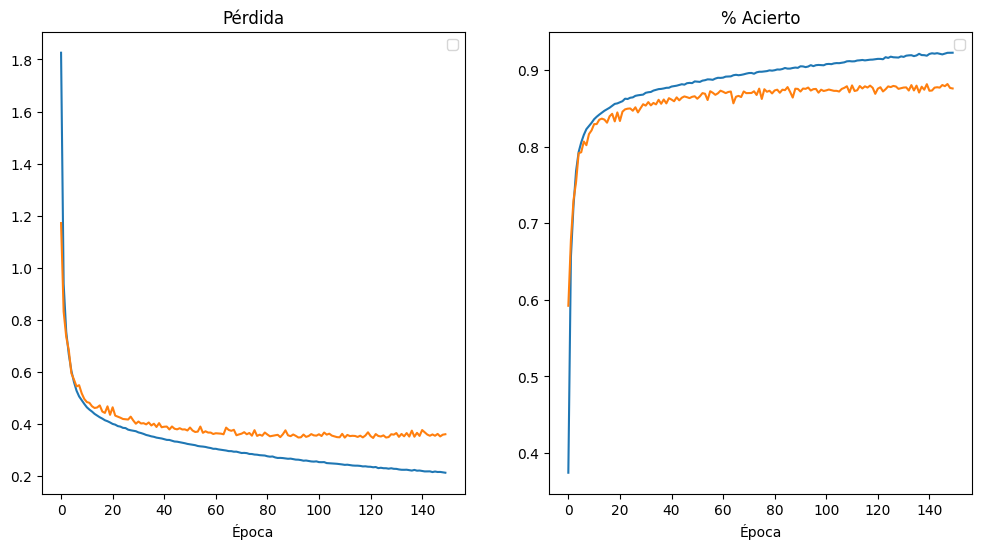

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 3. Mejora de modelo

In [ ]:
h1 = 60
h2 = 30

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='tanh'))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_102 (Dense)           (None, 60)                47100     
                                                                 
 dense_103 (Dense)           (None, 30)                1830      
                                                                 
 dense_104 (Dense)           (None, 30)                930       
                                                                 
 dense_105 (Dense)           (None, 30)                930       
                                                                 
 dense_106 (Dense)           (None, 10)                310       
                                                                 
Total params: 51100 (199.61 KB)
Trainable params: 511

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=80,
                    batch_size=126,
               validation_data=(testX,testY))

Epoch 1/80
477/477 [==============================] - 4s 5ms/step - loss: 0.6222 - accuracy: 0.7995 - val_loss: 0.4525 - val_accuracy: 0.8435
Epoch 2/80
477/477 [==============================] - 2s 4ms/step - loss: 0.3875 - accuracy: 0.8608 - val_loss: 0.4121 - val_accuracy: 0.8556
Epoch 3/80
477/477 [==============================] - 2s 4ms/step - loss: 0.3482 - accuracy: 0.8741 - val_loss: 0.3705 - val_accuracy: 0.8688
Epoch 4/80
477/477 [==============================] - 2s 4ms/step - loss: 0.3265 - accuracy: 0.8808 - val_loss: 0.3690 - val_accuracy: 0.8687
Epoch 5/80
477/477 [==============================] - 2s 5ms/step - loss: 0.3064 - accuracy: 0.8886 - val_loss: 0.3725 - val_accuracy: 0.8652
Epoch 6/80
477/477 [==============================] - 3s 6ms/step - loss: 0.2933 - accuracy: 0.8916 - val_loss: 0.3475 - val_accuracy: 0.8724
Epoch 7/80
477/477 [==============================] - 2s 5ms/step - loss: 0.2843 - accuracy: 0.8956 - val_loss: 0.3486 - val_accuracy: 0.8765
Epoch 

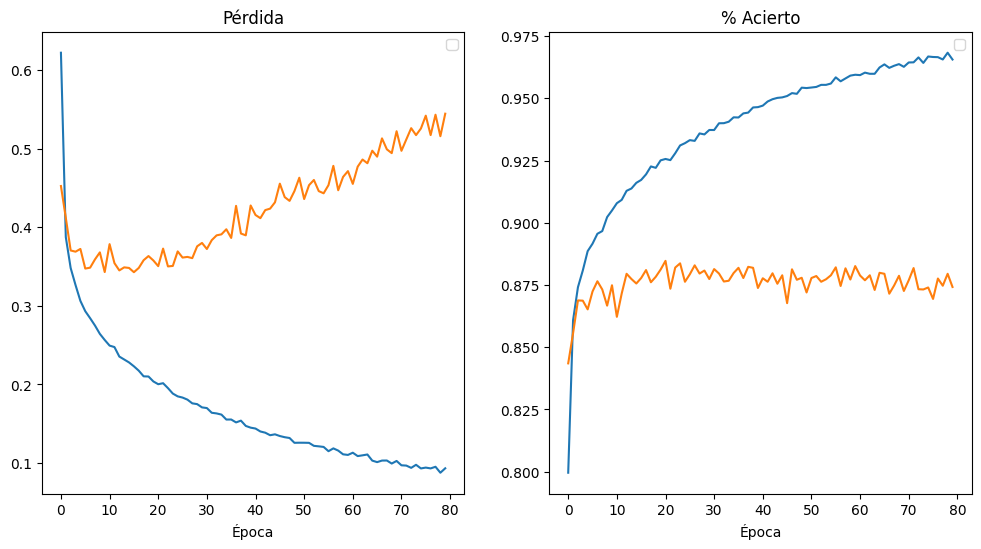

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 4. Modelo con regularización

In [ ]:
h1 = 60
h2 = 30

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='tanh'))
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dropout(0.25))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dropout(0.4))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dropout(0.4))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_46 (Flatten)        (None, 784)               0         
                                                                 
 dense_261 (Dense)           (None, 60)                47100     
                                                                 
 dropout_149 (Dropout)       (None, 60)                0         
                                                                 
 dense_262 (Dense)           (None, 30)                1830      
                                                                 
 dropout_150 (Dropout)       (None, 30)                0         
                                                                 
 dense_263 (Dense)           (None, 30)                930       
                                                                 
 dropout_151 (Dropout)       (None, 30)              

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=80,
                    batch_size=126,
               validation_data=(testX,testY))

Epoch 1/80
477/477 [==============================] - 4s 6ms/step - loss: 1.0302 - accuracy: 0.6398 - val_loss: 0.5673 - val_accuracy: 0.7931
Epoch 2/80
477/477 [==============================] - 3s 5ms/step - loss: 0.6811 - accuracy: 0.7741 - val_loss: 0.5162 - val_accuracy: 0.8263
Epoch 3/80
477/477 [==============================] - 3s 6ms/step - loss: 0.6100 - accuracy: 0.8007 - val_loss: 0.4855 - val_accuracy: 0.8291
Epoch 4/80
477/477 [==============================] - 3s 6ms/step - loss: 0.5779 - accuracy: 0.8134 - val_loss: 0.4739 - val_accuracy: 0.8420
Epoch 5/80
477/477 [==============================] - 3s 6ms/step - loss: 0.5502 - accuracy: 0.8235 - val_loss: 0.4774 - val_accuracy: 0.8406
Epoch 6/80
477/477 [==============================] - 3s 5ms/step - loss: 0.5402 - accuracy: 0.8270 - val_loss: 0.4663 - val_accuracy: 0.8453
Epoch 7/80
477/477 [==============================] - 3s 5ms/step - loss: 0.5286 - accuracy: 0.8332 - val_loss: 0.4602 - val_accuracy: 0.8482
Epoch 

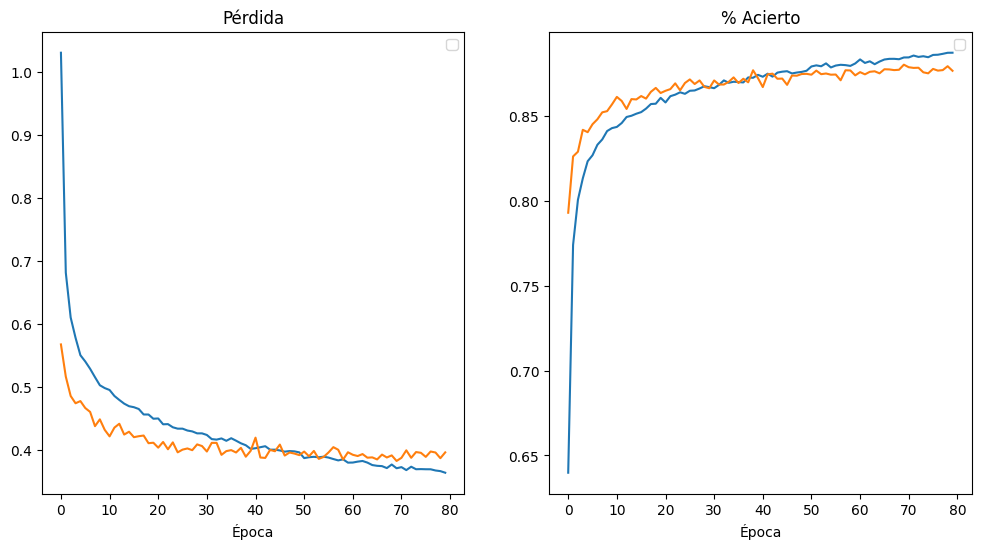

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()


# Modelo 2 (mediano)

## 2. Arquitectura

In [ ]:
h1 = 154
h2 = 77

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_112 (Dense)           (None, 154)               120890    
                                                                 
 dense_113 (Dense)           (None, 77)                11935     
                                                                 
 dense_114 (Dense)           (None, 77)                6006      
                                                                 
 dense_115 (Dense)           (None, 77)                6006      
                                                                 
 dense_116 (Dense)           (None, 77)                6006      
                                                                 
 dense_117 (Dense)           (None, 77)              

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=150,
                    batch_size=200,
               validation_data=(testX,testY))

Epoch 1/150
300/300 [==============================] - 4s 9ms/step - loss: 1.7401 - accuracy: 0.4153 - val_loss: 1.0051 - val_accuracy: 0.6272
Epoch 2/150
300/300 [==============================] - 2s 7ms/step - loss: 0.8649 - accuracy: 0.6650 - val_loss: 0.8105 - val_accuracy: 0.6874
Epoch 3/150
300/300 [==============================] - 2s 7ms/step - loss: 0.7504 - accuracy: 0.7211 - val_loss: 0.7252 - val_accuracy: 0.7315
Epoch 4/150
300/300 [==============================] - 2s 7ms/step - loss: 0.6740 - accuracy: 0.7615 - val_loss: 0.6488 - val_accuracy: 0.7812
Epoch 5/150
300/300 [==============================] - 2s 7ms/step - loss: 0.6030 - accuracy: 0.7883 - val_loss: 0.5936 - val_accuracy: 0.7941
Epoch 6/150
300/300 [==============================] - 3s 10ms/step - loss: 0.5513 - accuracy: 0.8056 - val_loss: 0.5476 - val_accuracy: 0.8079
Epoch 7/150
300/300 [==============================] - 3s 11ms/step - loss: 0.5141 - accuracy: 0.8188 - val_loss: 0.5186 - val_accuracy: 0.81

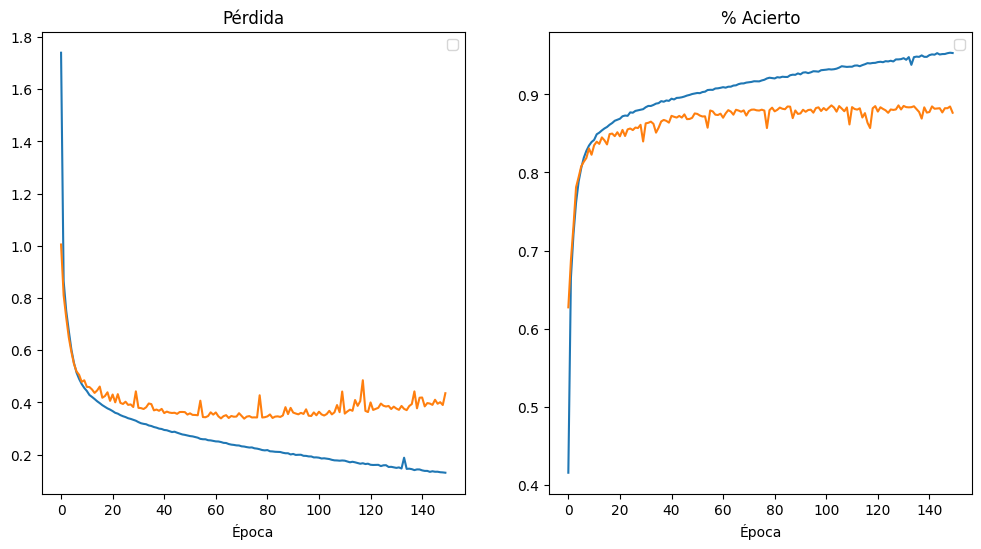

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 3. Mejora de modelo

In [ ]:
h1 = 154
h2 = 77

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_119 (Dense)           (None, 154)               120890    
                                                                 
 dense_120 (Dense)           (None, 77)                11935     
                                                                 
 dense_121 (Dense)           (None, 77)                6006      
                                                                 
 dense_122 (Dense)           (None, 77)                6006      
                                                                 
 dense_123 (Dense)           (None, 77)                6006      
                                                                 
 dense_124 (Dense)           (None, 77)              

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=40,
                    batch_size= 100,
               validation_data=(testX,testY))

Epoch 1/40
600/600 [==============================] - 8s 12ms/step - loss: 1.4036 - accuracy: 0.5216 - val_loss: 0.7865 - val_accuracy: 0.6934
Epoch 2/40
600/600 [==============================] - 5s 8ms/step - loss: 0.6640 - accuracy: 0.7648 - val_loss: 0.5977 - val_accuracy: 0.7912
Epoch 3/40
600/600 [==============================] - 4s 6ms/step - loss: 0.5522 - accuracy: 0.8062 - val_loss: 0.5431 - val_accuracy: 0.8009
Epoch 4/40
600/600 [==============================] - 5s 9ms/step - loss: 0.4988 - accuracy: 0.8257 - val_loss: 0.5156 - val_accuracy: 0.8217
Epoch 5/40
600/600 [==============================] - 6s 10ms/step - loss: 0.4667 - accuracy: 0.8350 - val_loss: 0.5013 - val_accuracy: 0.8165
Epoch 6/40
600/600 [==============================] - 5s 9ms/step - loss: 0.4434 - accuracy: 0.8441 - val_loss: 0.4524 - val_accuracy: 0.8404
Epoch 7/40
600/600 [==============================] - 4s 7ms/step - loss: 0.4248 - accuracy: 0.8496 - val_loss: 0.4580 - val_accuracy: 0.8403
Epoc

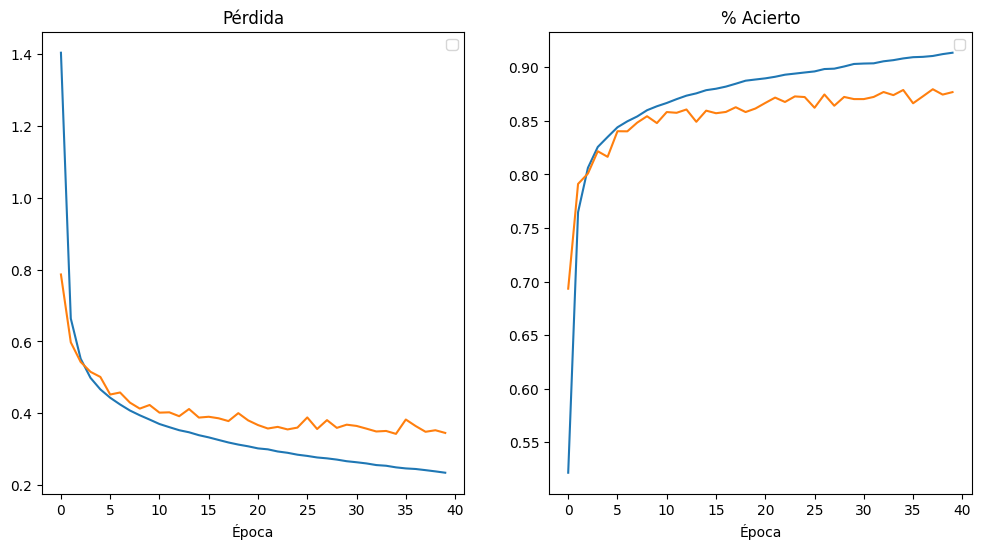

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 4. Modelo con regularización

In [ ]:
h1 = 154
h2 = 77

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.BatchNormalization())
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.BatchNormalization())
red.add(keras.layers.Dropout(0.5))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.BatchNormalization())
red.add(keras.layers.Dropout(0.3))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.BatchNormalization())
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.BatchNormalization())
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.BatchNormalization())
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_50 (Flatten)        (None, 784)               0         
                                                                 
 dense_283 (Dense)           (None, 154)               120890    
                                                                 
 batch_normalization_6 (Bat  (None, 154)               616       
 chNormalization)                                                
                                                                 
 dropout_167 (Dropout)       (None, 154)               0         
                                                                 
 dense_284 (Dense)           (None, 77)                11935     
                                                                 
 batch_normalization_7 (Bat  (None, 77)                308       
 chNormalization)                                    

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=80,
                    batch_size= 160,
               validation_data=(testX,testY))

Epoch 1/80
375/375 [==============================] - 8s 15ms/step - loss: 0.9562 - accuracy: 0.6620 - val_loss: 0.6034 - val_accuracy: 0.7978
Epoch 2/80
375/375 [==============================] - 4s 11ms/step - loss: 0.5672 - accuracy: 0.8080 - val_loss: 0.4693 - val_accuracy: 0.8400
Epoch 3/80
375/375 [==============================] - 4s 11ms/step - loss: 0.4999 - accuracy: 0.8335 - val_loss: 0.4679 - val_accuracy: 0.8430
Epoch 4/80
375/375 [==============================] - 5s 13ms/step - loss: 0.4700 - accuracy: 0.8415 - val_loss: 0.4379 - val_accuracy: 0.8517
Epoch 5/80
375/375 [==============================] - 4s 11ms/step - loss: 0.4454 - accuracy: 0.8494 - val_loss: 0.4444 - val_accuracy: 0.8529
Epoch 6/80
375/375 [==============================] - 4s 11ms/step - loss: 0.4341 - accuracy: 0.8540 - val_loss: 0.4112 - val_accuracy: 0.8592
Epoch 7/80
375/375 [==============================] - 5s 14ms/step - loss: 0.4168 - accuracy: 0.8589 - val_loss: 0.3986 - val_accuracy: 0.8585

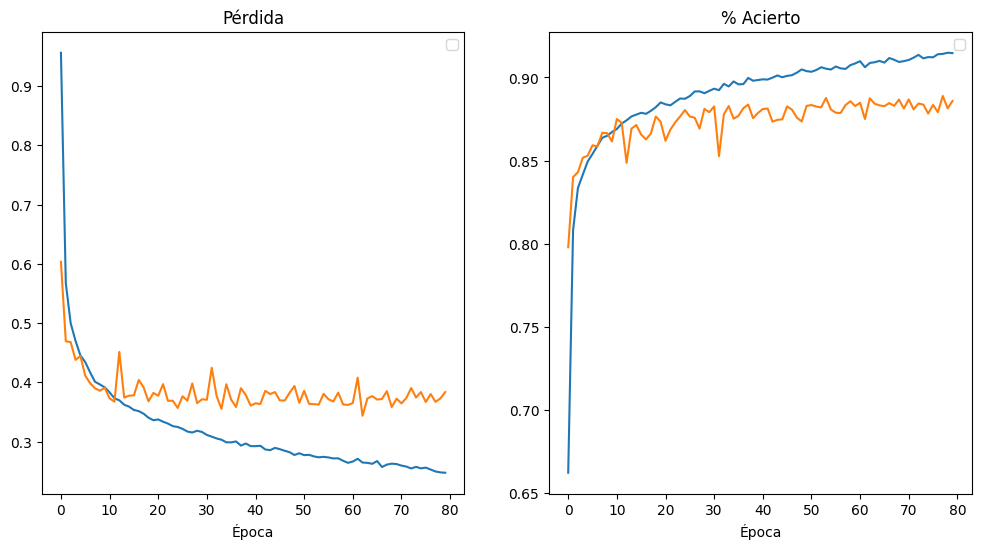

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

# Modelo 3 (mediano)

## 2. Arquitectura

In [ ]:
h1 = 200
h2 = 300

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_133 (Dense)           (None, 200)               157000    
                                                                 
 dense_134 (Dense)           (None, 300)               60300     
                                                                 
 dense_135 (Dense)           (None, 300)               90300     
                                                                 
 dense_136 (Dense)           (None, 10)                3010      
                                                                 
Total params: 310610 (1.18 MB)
Trainable params: 310610 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=150,
                    batch_size=200,
               validation_data=(testX,testY))

Epoch 1/150
300/300 [==============================] - 5s 15ms/step - loss: 1.3382 - accuracy: 0.6076 - val_loss: 0.8368 - val_accuracy: 0.6998
Epoch 2/150
300/300 [==============================] - 3s 11ms/step - loss: 0.7240 - accuracy: 0.7528 - val_loss: 0.6736 - val_accuracy: 0.7691
Epoch 3/150
300/300 [==============================] - 3s 10ms/step - loss: 0.6144 - accuracy: 0.7942 - val_loss: 0.6197 - val_accuracy: 0.7835
Epoch 4/150
300/300 [==============================] - 4s 12ms/step - loss: 0.5588 - accuracy: 0.8088 - val_loss: 0.5607 - val_accuracy: 0.8079
Epoch 5/150
300/300 [==============================] - 4s 12ms/step - loss: 0.5247 - accuracy: 0.8200 - val_loss: 0.5616 - val_accuracy: 0.7966
Epoch 6/150
300/300 [==============================] - 3s 10ms/step - loss: 0.5003 - accuracy: 0.8281 - val_loss: 0.5226 - val_accuracy: 0.8137
Epoch 7/150
300/300 [==============================] - 3s 10ms/step - loss: 0.4835 - accuracy: 0.8308 - val_loss: 0.4989 - val_accuracy:

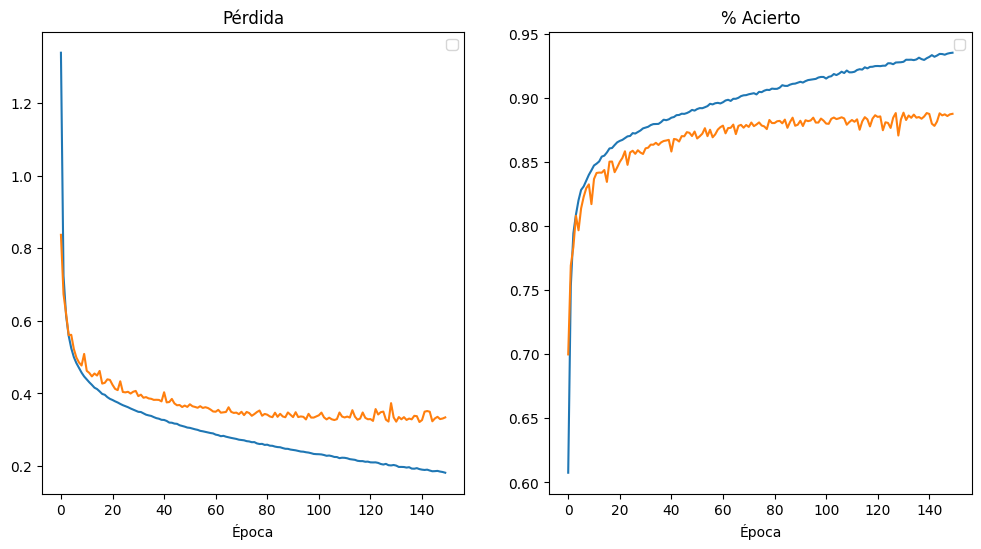

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 3. Mejora de modelo

In [ ]:
h1 = 200
h2 = 300

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_137 (Dense)           (None, 200)               157000    
                                                                 
 dense_138 (Dense)           (None, 300)               60300     
                                                                 
 dense_139 (Dense)           (None, 300)               90300     
                                                                 
 dense_140 (Dense)           (None, 10)                3010      
                                                                 
Total params: 310610 (1.18 MB)
Trainable params: 310610 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=30,
                    batch_size=170,
               validation_data=(testX,testY))

Epoch 1/30
353/353 [==============================] - 4s 11ms/step - loss: 0.5825 - accuracy: 0.7857 - val_loss: 0.4501 - val_accuracy: 0.8322
Epoch 2/30
353/353 [==============================] - 5s 13ms/step - loss: 0.3950 - accuracy: 0.8531 - val_loss: 0.3940 - val_accuracy: 0.8573
Epoch 3/30
353/353 [==============================] - 4s 10ms/step - loss: 0.3475 - accuracy: 0.8704 - val_loss: 0.4143 - val_accuracy: 0.8462
Epoch 4/30
353/353 [==============================] - 4s 10ms/step - loss: 0.3199 - accuracy: 0.8805 - val_loss: 0.3923 - val_accuracy: 0.8560
Epoch 5/30
353/353 [==============================] - 5s 13ms/step - loss: 0.2968 - accuracy: 0.8886 - val_loss: 0.3593 - val_accuracy: 0.8736
Epoch 6/30
353/353 [==============================] - 4s 11ms/step - loss: 0.2812 - accuracy: 0.8932 - val_loss: 0.3515 - val_accuracy: 0.8701
Epoch 7/30
353/353 [==============================] - 4s 10ms/step - loss: 0.2662 - accuracy: 0.8985 - val_loss: 0.3445 - val_accuracy: 0.8769

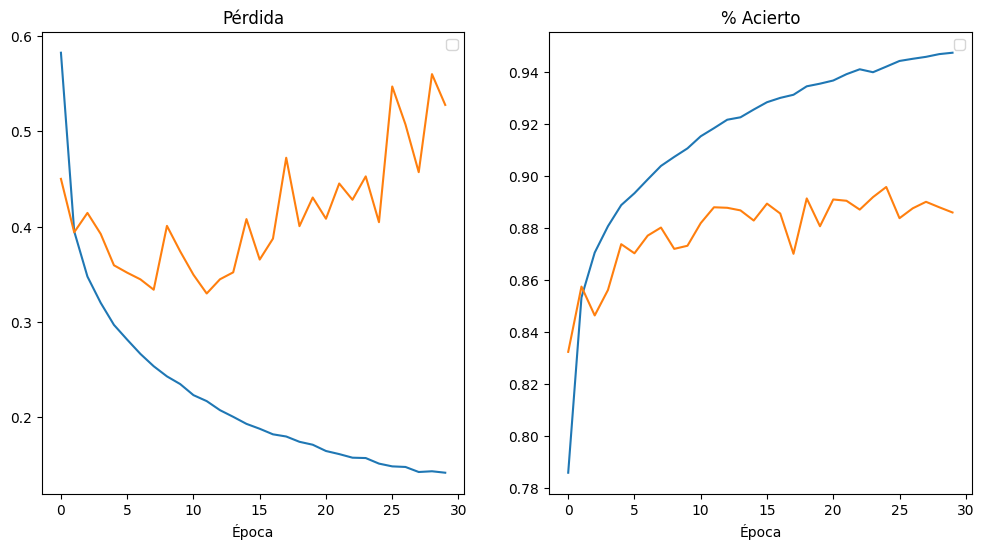

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 4. Modelo con regularización

In [44]:
h1 = 200
h2 = 300

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dropout(0.4))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dropout(0.3))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 200)               157000    
                                                                 
 dropout_25 (Dropout)        (None, 200)               0         
                                                                 
 dense_38 (Dense)            (None, 300)               60300     
                                                                 
 dropout_26 (Dropout)        (None, 300)               0         
                                                                 
 dense_39 (Dense)            (None, 300)               90300     
                                                                 
 dropout_27 (Dropout)        (None, 300)              

In [45]:
hist = red.fit(trainX, trainY,
                    epochs=30,
                    batch_size=170,
               validation_data=(testX,testY))

Epoch 1/30
353/353 [==============================] - 2s 5ms/step - loss: 0.6700 - accuracy: 0.7569 - val_loss: 0.4980 - val_accuracy: 0.8182
Epoch 2/30
353/353 [==============================] - 1s 4ms/step - loss: 0.4722 - accuracy: 0.8283 - val_loss: 0.4275 - val_accuracy: 0.8434
Epoch 3/30
353/353 [==============================] - 1s 4ms/step - loss: 0.4305 - accuracy: 0.8454 - val_loss: 0.3982 - val_accuracy: 0.8568
Epoch 4/30
353/353 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.8521 - val_loss: 0.3849 - val_accuracy: 0.8606
Epoch 5/30
353/353 [==============================] - 1s 4ms/step - loss: 0.3905 - accuracy: 0.8583 - val_loss: 0.3871 - val_accuracy: 0.8636
Epoch 6/30
353/353 [==============================] - 2s 5ms/step - loss: 0.3721 - accuracy: 0.8658 - val_loss: 0.3826 - val_accuracy: 0.8646
Epoch 7/30
353/353 [==============================] - 2s 5ms/step - loss: 0.3668 - accuracy: 0.8661 - val_loss: 0.3595 - val_accuracy: 0.8715
Epoch 

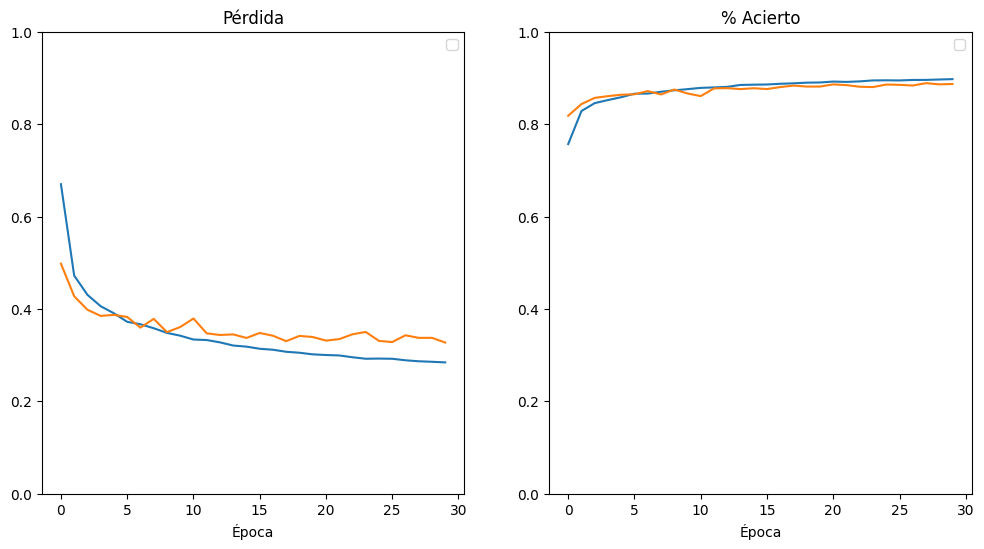

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.set_ylim([0, 1])
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.set_ylim([0, 1])
ax2.legend()

# Modelo 4 (mediano)

## 2. Arquitectura

In [ ]:
h1 = 460
h2 = 230

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 784)               0         
                                                                 
 dense_145 (Dense)           (None, 460)               361100    
                                                                 
 dense_146 (Dense)           (None, 230)               106030    
                                                                 
 dense_147 (Dense)           (None, 10)                2310      
                                                                 
Total params: 469440 (1.79 MB)
Trainable params: 469440 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=150,
                    batch_size= 200,
               validation_data=(testX,testY))

Epoch 1/150
300/300 [==============================] - 4s 13ms/step - loss: 1.1591 - accuracy: 0.6731 - val_loss: 0.7993 - val_accuracy: 0.7380
Epoch 2/150
300/300 [==============================] - 5s 16ms/step - loss: 0.6936 - accuracy: 0.7806 - val_loss: 0.6559 - val_accuracy: 0.7807
Epoch 3/150
300/300 [==============================] - 4s 12ms/step - loss: 0.5978 - accuracy: 0.8062 - val_loss: 0.5904 - val_accuracy: 0.8024
Epoch 4/150
300/300 [==============================] - 4s 12ms/step - loss: 0.5486 - accuracy: 0.8186 - val_loss: 0.5533 - val_accuracy: 0.8137
Epoch 5/150
300/300 [==============================] - 5s 16ms/step - loss: 0.5182 - accuracy: 0.8271 - val_loss: 0.5296 - val_accuracy: 0.8194
Epoch 6/150
300/300 [==============================] - 4s 12ms/step - loss: 0.4958 - accuracy: 0.8330 - val_loss: 0.5131 - val_accuracy: 0.8249
Epoch 7/150
300/300 [==============================] - 4s 12ms/step - loss: 0.4802 - accuracy: 0.8369 - val_loss: 0.4977 - val_accuracy:

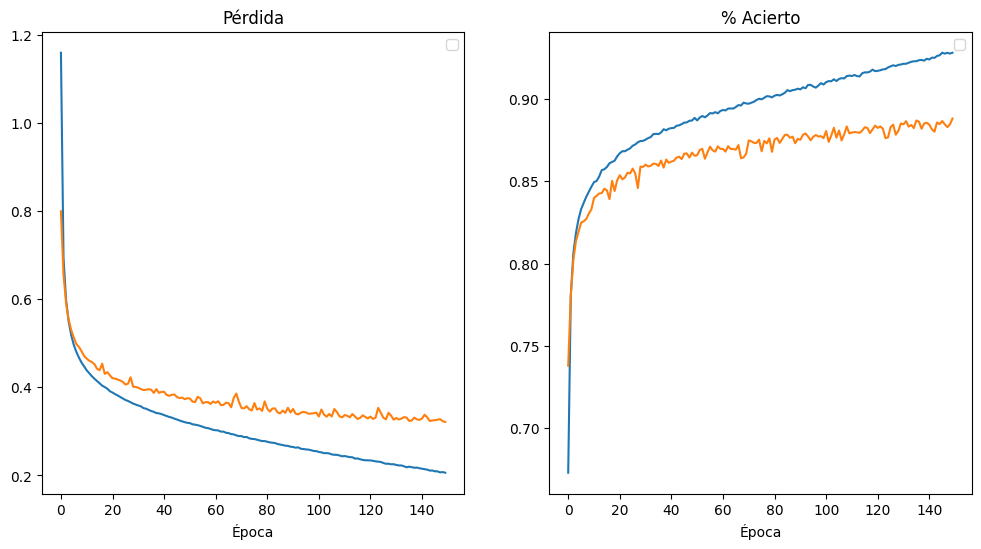

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 3. Mejora de modelo

In [ ]:
h1 = 460
h2 = 230

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='sigmoid'))
red.add(keras.layers.Dense(h2, activation='sigmoid'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 dense_148 (Dense)           (None, 460)               361100    
                                                                 
 dense_149 (Dense)           (None, 230)               106030    
                                                                 
 dense_150 (Dense)           (None, 10)                2310      
                                                                 
Total params: 469440 (1.79 MB)
Trainable params: 469440 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=15,
                    batch_size= 100,
               validation_data=(testX,testY))

Epoch 1/15
600/600 [==============================] - 7s 11ms/step - loss: 0.6019 - accuracy: 0.7901 - val_loss: 0.4733 - val_accuracy: 0.8250
Epoch 2/15
600/600 [==============================] - 7s 12ms/step - loss: 0.4035 - accuracy: 0.8531 - val_loss: 0.4349 - val_accuracy: 0.8455
Epoch 3/15
600/600 [==============================] - 8s 13ms/step - loss: 0.3638 - accuracy: 0.8671 - val_loss: 0.3920 - val_accuracy: 0.8609
Epoch 4/15
600/600 [==============================] - 7s 12ms/step - loss: 0.3418 - accuracy: 0.8757 - val_loss: 0.3748 - val_accuracy: 0.8637
Epoch 5/15
600/600 [==============================] - 7s 12ms/step - loss: 0.3196 - accuracy: 0.8831 - val_loss: 0.3824 - val_accuracy: 0.8655
Epoch 6/15
600/600 [==============================] - 6s 11ms/step - loss: 0.3032 - accuracy: 0.8903 - val_loss: 0.3565 - val_accuracy: 0.8704
Epoch 7/15
600/600 [==============================] - 7s 12ms/step - loss: 0.2875 - accuracy: 0.8939 - val_loss: 0.3394 - val_accuracy: 0.8766

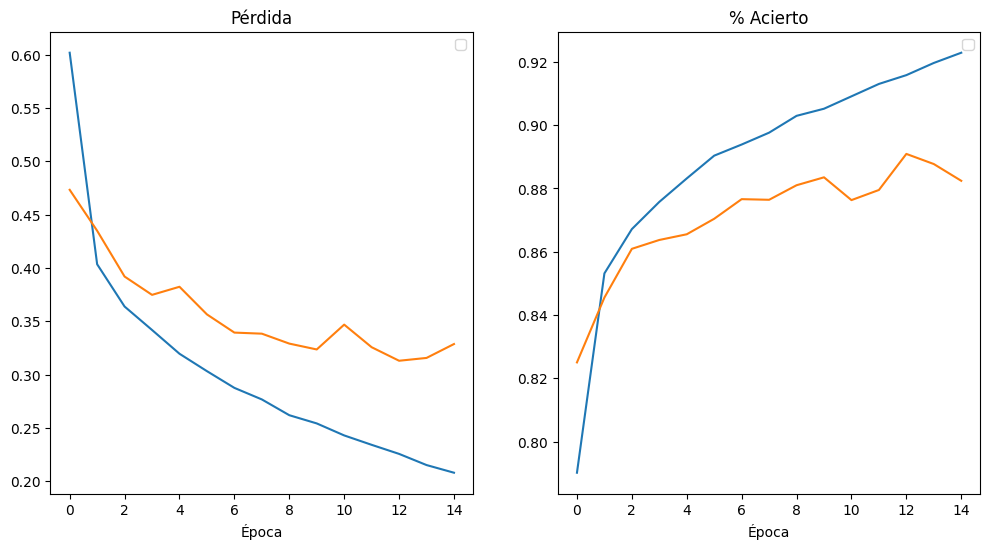

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 4. Modelo con regularización

In [ ]:
h1 = 460
h2 = 230

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='tanh', bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
red.add(keras.layers.Dropout(0.3))
red.add(keras.layers.Dense(h2, activation='tanh', bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
red.add(keras.layers.Dropout(0.3))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_53 (Flatten)        (None, 784)               0         
                                                                 
 dense_296 (Dense)           (None, 460)               361100    
                                                                 
 dropout_177 (Dropout)       (None, 460)               0         
                                                                 
 dense_297 (Dense)           (None, 230)               106030    
                                                                 
 dropout_178 (Dropout)       (None, 230)               0         
                                                                 
 dense_298 (Dense)           (None, 10)                2310      
                                                                 
Total params: 469440 (1.79 MB)
Trainable params: 4694

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs=15,
                    batch_size= 100,
               validation_data=(testX,testY))

Epoch 1/15
600/600 [==============================] - 10s 15ms/step - loss: 0.5699 - accuracy: 0.7944 - val_loss: 0.4760 - val_accuracy: 0.8282
Epoch 2/15
600/600 [==============================] - 7s 12ms/step - loss: 0.4478 - accuracy: 0.8378 - val_loss: 0.4006 - val_accuracy: 0.8546
Epoch 3/15
600/600 [==============================] - 8s 13ms/step - loss: 0.4048 - accuracy: 0.8535 - val_loss: 0.4035 - val_accuracy: 0.8553
Epoch 4/15
600/600 [==============================] - 8s 14ms/step - loss: 0.3825 - accuracy: 0.8601 - val_loss: 0.3816 - val_accuracy: 0.8624
Epoch 5/15
600/600 [==============================] - 7s 12ms/step - loss: 0.3662 - accuracy: 0.8667 - val_loss: 0.3775 - val_accuracy: 0.8637
Epoch 6/15
600/600 [==============================] - 8s 14ms/step - loss: 0.3540 - accuracy: 0.8710 - val_loss: 0.3666 - val_accuracy: 0.8688
Epoch 7/15
600/600 [==============================] - 7s 12ms/step - loss: 0.3453 - accuracy: 0.8725 - val_loss: 0.3573 - val_accuracy: 0.871

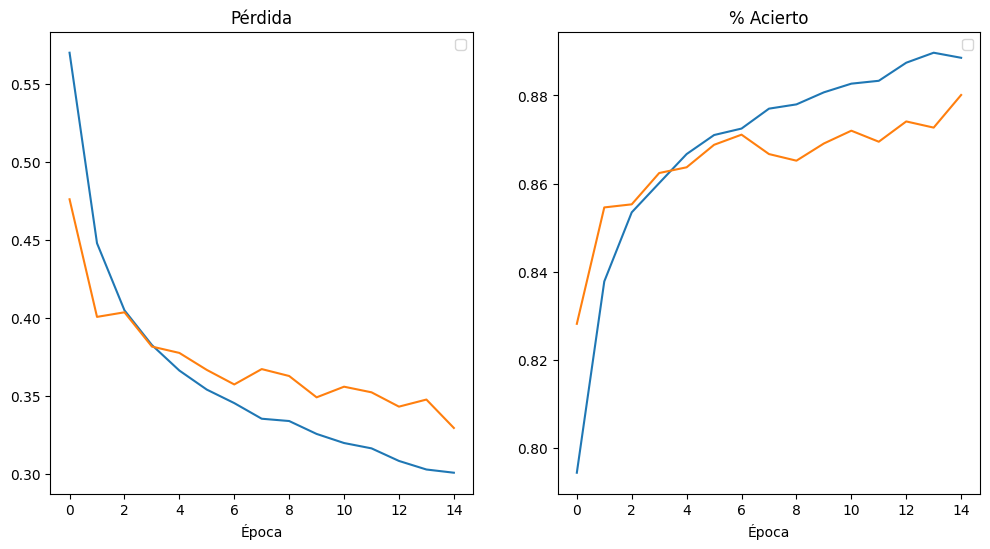

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

# Modelo 5 (grande)

## 2. Arquitectura

In [ ]:
h1 = 750
h2 = 375

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_34 (Flatten)        (None, 784)               0         
                                                                 
 dense_154 (Dense)           (None, 750)               588750    
                                                                 
 dense_155 (Dense)           (None, 375)               281625    
                                                                 
 dense_156 (Dense)           (None, 375)               141000    
                                                                 
 dense_157 (Dense)           (None, 375)               141000    
                                                                 
 dense_158 (Dense)           (None, 375)               141000    
                                                                 
 dense_159 (Dense)           (None, 10)              

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs= 150,
                    batch_size= 200,
               validation_data=(testX,testY))

Epoch 1/150
300/300 [==============================] - 12s 36ms/step - loss: 1.3685 - accuracy: 0.5907 - val_loss: 0.8158 - val_accuracy: 0.6991
Epoch 2/150
300/300 [==============================] - 11s 35ms/step - loss: 0.7013 - accuracy: 0.7527 - val_loss: 0.6470 - val_accuracy: 0.7721
Epoch 3/150
300/300 [==============================] - 11s 35ms/step - loss: 0.5897 - accuracy: 0.7936 - val_loss: 0.6459 - val_accuracy: 0.7577
Epoch 4/150
300/300 [==============================] - 11s 36ms/step - loss: 0.5297 - accuracy: 0.8139 - val_loss: 0.5270 - val_accuracy: 0.8123
Epoch 5/150
300/300 [==============================] - 9s 32ms/step - loss: 0.4977 - accuracy: 0.8245 - val_loss: 0.5045 - val_accuracy: 0.8207
Epoch 6/150
300/300 [==============================] - 11s 36ms/step - loss: 0.4673 - accuracy: 0.8346 - val_loss: 0.4927 - val_accuracy: 0.8237
Epoch 7/150
300/300 [==============================] - 11s 35ms/step - loss: 0.4509 - accuracy: 0.8408 - val_loss: 0.4664 - val_acc

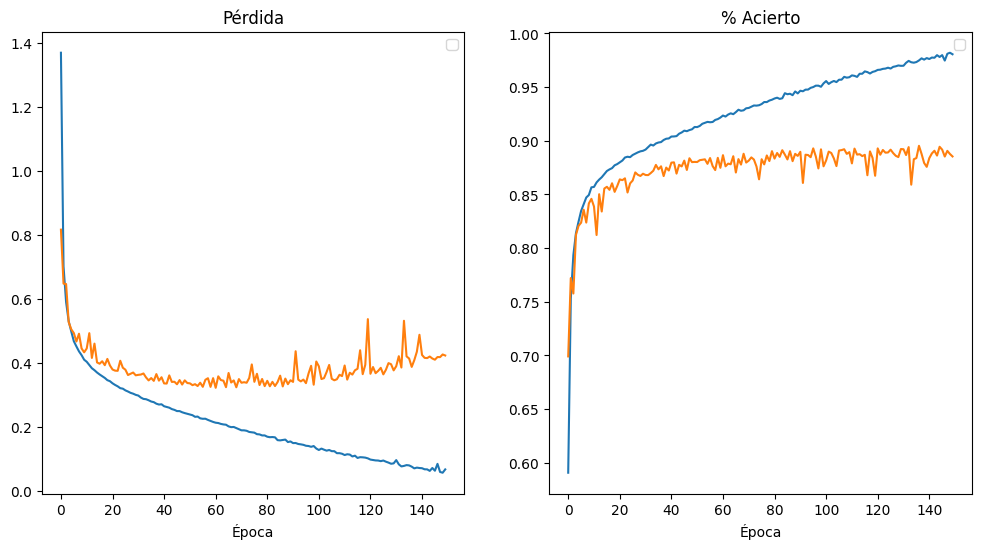

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 3. Mejora de modelo

In [ ]:
h1 = 750
h2 = 375

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='tanh'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 784)               0         
                                                                 
 dense_160 (Dense)           (None, 750)               588750    
                                                                 
 dense_161 (Dense)           (None, 375)               281625    
                                                                 
 dense_162 (Dense)           (None, 375)               141000    
                                                                 
 dense_163 (Dense)           (None, 375)               141000    
                                                                 
 dense_164 (Dense)           (None, 375)               141000    
                                                                 
 dense_165 (Dense)           (None, 10)              

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs= 15,
                    batch_size= 180,
               validation_data=(testX,testY))

Epoch 1/15
334/334 [==============================] - 12s 33ms/step - loss: 1.0350 - accuracy: 0.6849 - val_loss: 0.6898 - val_accuracy: 0.7545
Epoch 2/15
334/334 [==============================] - 11s 33ms/step - loss: 0.5787 - accuracy: 0.8018 - val_loss: 0.5576 - val_accuracy: 0.8039
Epoch 3/15
334/334 [==============================] - 11s 33ms/step - loss: 0.4965 - accuracy: 0.8268 - val_loss: 0.4976 - val_accuracy: 0.8237
Epoch 4/15
334/334 [==============================] - 10s 30ms/step - loss: 0.4592 - accuracy: 0.8366 - val_loss: 0.4868 - val_accuracy: 0.8244
Epoch 5/15
334/334 [==============================] - 11s 33ms/step - loss: 0.4371 - accuracy: 0.8439 - val_loss: 0.4550 - val_accuracy: 0.8379
Epoch 6/15
334/334 [==============================] - 11s 33ms/step - loss: 0.4221 - accuracy: 0.8494 - val_loss: 0.4446 - val_accuracy: 0.8411
Epoch 7/15
334/334 [==============================] - 11s 33ms/step - loss: 0.4065 - accuracy: 0.8555 - val_loss: 0.4784 - val_accuracy:

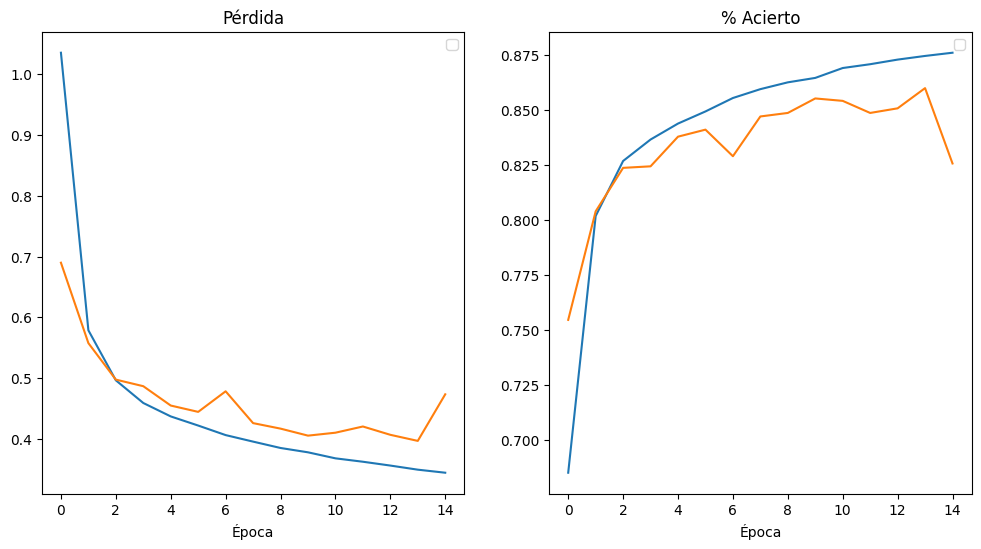

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

## 4. Modelo con regularización

In [ ]:
h1 = 750
h2 = 375

red = keras.Sequential()
red.add(keras.layers.Flatten(input_shape=(28, 28)))
red.add(keras.layers.Dense(h1, activation='tanh'))
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dropout(0.3))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dropout(0.3))
red.add(keras.layers.Dense(h2, activation='tanh'))
red.add(keras.layers.Dropout(0.1))
red.add(keras.layers.Dense(10, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_48 (Flatten)        (None, 784)               0         
                                                                 
 dense_273 (Dense)           (None, 750)               588750    
                                                                 
 dropout_159 (Dropout)       (None, 750)               0         
                                                                 
 dense_274 (Dense)           (None, 375)               281625    
                                                                 
 dropout_160 (Dropout)       (None, 375)               0         
                                                                 
 dense_275 (Dense)           (None, 375)               141000    
                                                                 
 dropout_161 (Dropout)       (None, 375)             

In [ ]:
hist = red.fit(trainX, trainY,
                    epochs= 15,
                    batch_size= 180,
               validation_data=(testX,testY))

Epoch 1/15
334/334 [==============================] - 14s 40ms/step - loss: 1.2801 - accuracy: 0.5510 - val_loss: 0.7452 - val_accuracy: 0.7134
Epoch 2/15
334/334 [==============================] - 13s 39ms/step - loss: 0.7585 - accuracy: 0.7219 - val_loss: 0.6138 - val_accuracy: 0.7679
Epoch 3/15
334/334 [==============================] - 13s 39ms/step - loss: 0.6457 - accuracy: 0.7650 - val_loss: 0.5561 - val_accuracy: 0.7966
Epoch 4/15
334/334 [==============================] - 15s 45ms/step - loss: 0.5842 - accuracy: 0.7894 - val_loss: 0.5312 - val_accuracy: 0.8069
Epoch 5/15
334/334 [==============================] - 13s 38ms/step - loss: 0.5510 - accuracy: 0.8012 - val_loss: 0.4980 - val_accuracy: 0.8192
Epoch 6/15
334/334 [==============================] - 13s 38ms/step - loss: 0.5218 - accuracy: 0.8135 - val_loss: 0.4871 - val_accuracy: 0.8256
Epoch 7/15
334/334 [==============================] - 13s 39ms/step - loss: 0.4999 - accuracy: 0.8225 - val_loss: 0.4687 - val_accuracy:

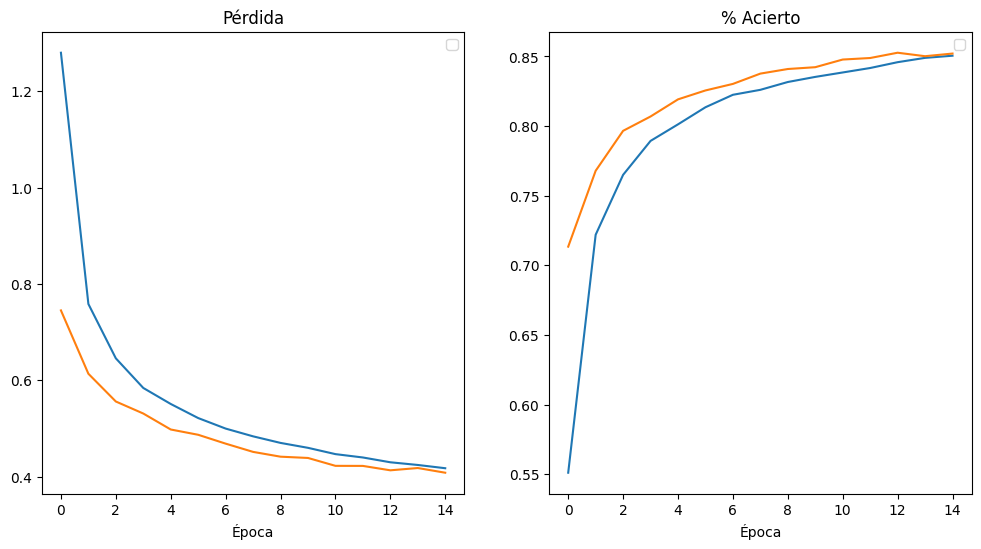

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_title('Pérdida')
ax1.set_xlabel('Época')
ax1.legend()

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])
ax2.set_title('% Acierto')
ax2.set_xlabel('Época')
ax2.legend()

# Grilla de mejores resultados

##Grilla Modelo 2

1/1 [==============================] - 0s 37ms/step


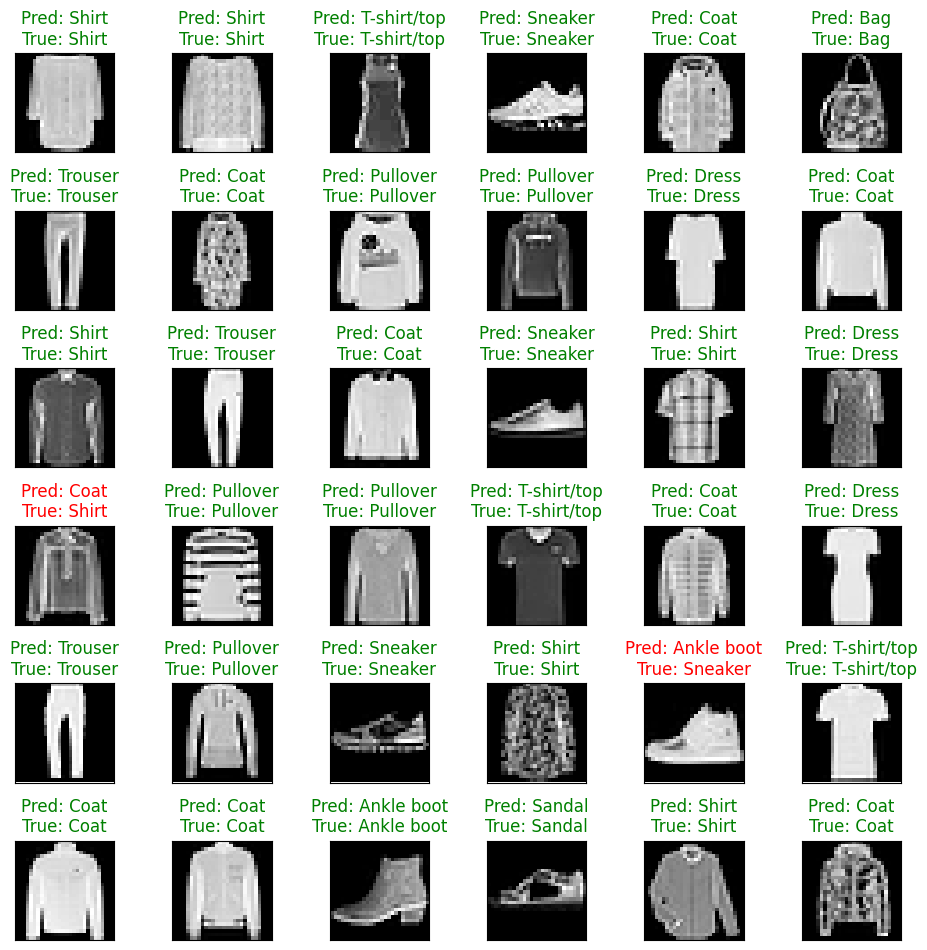

In [ ]:
h = 6
w = 6

fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))


for i in range(h):
    for j in range(w):

        ex = np.random.randint(len(testX))

        image = testX[ex]
        true_label = testY[ex]

        input_image = image.reshape(1, 28,28)
        predicted_probs = red.predict(input_image)
        predicted_label = int(np.argmax(predicted_probs))
        true_label = int(np.argmax(true_label))

        axs[i, j].set_title(f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}', color='green' if predicted_label == true_label else 'red')
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()

## Grilla Modelo 3

1/1 [==============================] - 0s 21ms/step


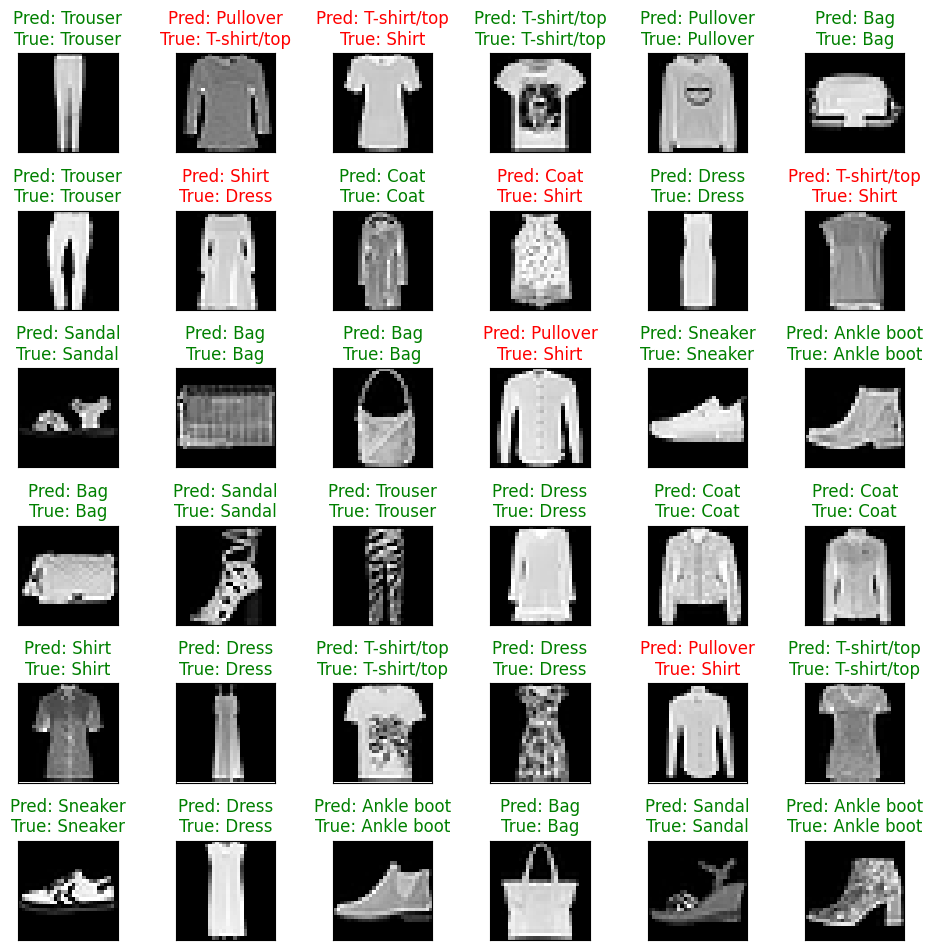

In [ ]:
h = 6
w = 6

fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))


for i in range(h):
    for j in range(w):

        ex = np.random.randint(len(testX))

        image = testX[ex]
        true_label = testY[ex]

        input_image = image.reshape(1, 28,28)
        predicted_probs = red.predict(input_image)
        predicted_label = int(np.argmax(predicted_probs))
        true_label = int(np.argmax(true_label))

        axs[i, j].set_title(f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}', color='green' if predicted_label == true_label else 'red')
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()

## Grilla modelo 4

1/1 [==============================] - 0s 24ms/step


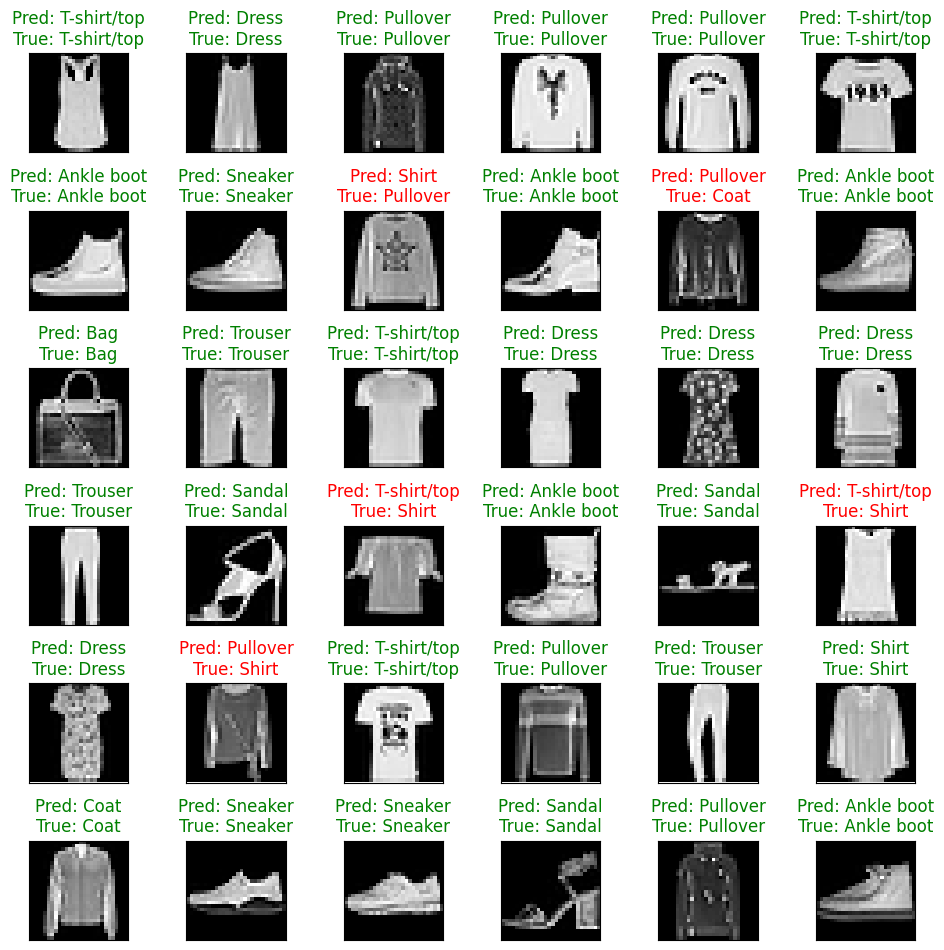

In [ ]:
h = 6
w = 6

fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))


for i in range(h):
    for j in range(w):

        ex = np.random.randint(len(testX))

        image = testX[ex]
        true_label = testY[ex]

        input_image = image.reshape(1, 28,28)
        predicted_probs = red.predict(input_image)
        predicted_label = int(np.argmax(predicted_probs))
        true_label = int(np.argmax(true_label))

        axs[i, j].set_title(f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}', color='green' if predicted_label == true_label else 'red')
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()